In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

loc = r"C:\Users\me\Documents\datasets\pump.csv"
loc2 = r"C:\Users\me\Documents\datasets\pump_labels.csv"

# Load data.
df = pd.read_csv(loc)
labels = pd.read_csv(loc2)

# Merge data and labels together in one dataframe.
df = pd.merge(df, labels, on='id')
del labels

In [3]:
# Explore data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [4]:
df.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [5]:
df.shape

(59400, 41)

In [6]:
# Check for nulls.

df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
# Deal with the columns containing null values one by one. Start with 'funder'.

df.funder.value_counts()

Government Of Tanzania      9084
Danida                      3114
Hesawa                      2202
Rwssp                       1374
World Bank                  1349
Kkkt                        1287
World Vision                1246
Unicef                      1057
Tasaf                        877
District Council             843
Dhv                          829
Private Individual           826
Dwsp                         811
0                            777
Norad                        765
Germany Republi              610
Tcrs                         602
Ministry Of Water            590
Water                        583
Dwe                          484
Netherlands                  470
Hifab                        450
Adb                          448
Lga                          442
Amref                        425
Fini Water                   393
Oxfam                        359
Wateraid                     333
Rc Church                    321
Isf                          316
          

In [8]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def funder_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
df['funder'] = df.apply(lambda row: funder_wrangler(row), axis=1)

In [9]:
# Add column named 'status_group_vals' to allow the use of a pivot table to check differences
# between the different funders.

vals_to_replace = {'functional':2, 'functional needs repair':1,
                   'non functional':0}

df['status_group_vals']  = df.status_group.replace(vals_to_replace)

In [10]:
piv_table = pd.pivot_table(df,index=['funder','status_group'],
                           values='status_group_vals', aggfunc='count')
piv_table

funder      status_group           
danida      functional                  1713
            functional needs repair      159
            non functional              1242
gov         functional                  3720
            functional needs repair      701
            non functional              4663
hesawa      functional                   936
            functional needs repair      232
            non functional              1034
other       functional                 24540
            functional needs repair     3019
            non functional             14718
rwssp       functional                   805
            functional needs repair      109
            non functional               460
world_bank  functional                   545
            functional needs repair       97
            non functional               707
Name: status_group_vals, dtype: int64

In [11]:
total_danida = piv_table[0] + piv_table[1] + piv_table[2]
percent_functional_danida = (piv_table[0] / total_danida) * 100

total_gov = piv_table[3] + piv_table[4] + piv_table[5]
percent_functional_gov = (piv_table[3] / total_gov) * 100

total_hesawa = piv_table[6] + piv_table[7] + piv_table[8]
percent_functional_hesawa = (piv_table[6] / total_hesawa) * 100

total_other = piv_table[9] + piv_table[10] + piv_table[11]
percent_functional_non_gov = (piv_table[9] / total_other) * 100

total_rwssp = piv_table[12] + piv_table[13] + piv_table[14]
percent_functional_rwssp = (piv_table[12] / total_rwssp) * 100

total_world_bank = piv_table[15] + piv_table[16] + piv_table[17]
percent_functional_world_bank = (piv_table[15] / total_world_bank) * 100

print('Percent functional danida: ', round(percent_functional_danida,3))
print('Percent functional gov: ', round(percent_functional_gov,3))
print('Percent functional hesawa: ', round(percent_functional_hesawa,3))
print('Percent functional non gov: ', round(percent_functional_non_gov,3))
print('Percent functional rwssp: ', round(percent_functional_rwssp,3))
print('Percent functional world bank: ', round(percent_functional_world_bank,3))

Percent functional danida:  55.01
Percent functional gov:  40.951
Percent functional hesawa:  42.507
Percent functional non gov:  58.046
Percent functional rwssp:  58.588
Percent functional world bank:  40.4


In [12]:
# There are some clear differences here that will hopefully improve the model. The next feature
# to inspect is 'installer'.

df.installer.value_counts()

DWE                       17402
Government                 1825
RWE                        1206
Commu                      1060
DANIDA                     1050
KKKT                        898
Hesawa                      840
0                           777
TCRS                        707
Central government          622
CES                         610
Community                   553
DANID                       552
District Council            551
HESAWA                      539
World vision                408
LGA                         408
WEDECO                      397
TASAF                       396
District council            392
Gover                       383
AMREF                       329
TWESA                       316
WU                          301
Dmdd                        287
ACRA                        278
World Vision                270
SEMA                        249
DW                          246
OXFAM                       234
                          ...  
Manyota 

In [13]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def installer_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    else:
        return 'other'  

df['installer'] = df.apply(lambda row: installer_wrangler(row), axis=1)

In [14]:
piv_table = pd.pivot_table(df,index=['funder','status_group'],
                           values='status_group_vals', aggfunc='count')
piv_table

funder      status_group           
danida      functional                  1713
            functional needs repair      159
            non functional              1242
gov         functional                  3720
            functional needs repair      701
            non functional              4663
hesawa      functional                   936
            functional needs repair      232
            non functional              1034
other       functional                 24540
            functional needs repair     3019
            non functional             14718
rwssp       functional                   805
            functional needs repair      109
            non functional               460
world_bank  functional                   545
            functional needs repair       97
            non functional               707
Name: status_group_vals, dtype: int64

In [15]:
total_dwe = piv_table[0] + piv_table[1] + piv_table[2]
percent_functional_dwe = (piv_table[0] / total_dwe) * 100

total_gov = piv_table[3] + piv_table[4] + piv_table[5]
percent_functional_gov = (piv_table[3] / total_gov) * 100

total_hesawa = piv_table[6] + piv_table[7] + piv_table[8]
percent_functional_hesawa = (piv_table[6] / total_hesawa) * 100

total_other = piv_table[9] + piv_table[10] + piv_table[11]
percent_functional_non_gov = (piv_table[9] / total_other) * 100

total_rwssp = piv_table[12] + piv_table[13] + piv_table[14]
percent_functional_rwssp = (piv_table[12] / total_rwssp) * 100

total_world_bank = piv_table[15] + piv_table[16] + piv_table[17]
percent_functional_world_bank = (piv_table[15] / total_world_bank) * 100

print('Percent functional dwe: ', round(percent_functional_dwe,3))
print('Percent functional gov: ', round(percent_functional_gov,3))
print('Percent functional hesawa: ', round(percent_functional_hesawa,3))
print('Percent functional non gov: ', round(percent_functional_non_gov,3))
print('Percent functional rwssp: ', round(percent_functional_rwssp,3))
print('Percent functional world bank: ', round(percent_functional_world_bank,3))

Percent functional dwe:  55.01
Percent functional gov:  40.951
Percent functional hesawa:  42.507
Percent functional non gov:  58.046
Percent functional rwssp:  58.588
Percent functional world bank:  40.4


In [16]:
# As was the case with 'funder' there are some clear differences here that will hopefully
# improve the model. The next feature to inspect is 'subvillage'.

print(df.subvillage.value_counts())

Madukani                      508
Shuleni                       506
Majengo                       502
Kati                          373
Mtakuja                       262
Sokoni                        232
M                             187
Muungano                      172
Mbuyuni                       164
Mlimani                       152
Songambele                    147
Miembeni                      134
Msikitini                     134
1                             132
Kibaoni                       114
Kanisani                      111
Mapinduzi                     109
I                             109
Mjini                         108
Mjimwema                      108
Mkwajuni                      104
Mwenge                        102
Mabatini                       98
Azimio                         98
Mission                        95
Mbugani                        95
Bwawani                        91
Bondeni                        90
Chang'Ombe                     88
Zahanati      

In [17]:
print('Number of villages: ', len(df.subvillage.value_counts()))

Number of villages:  19287


In [16]:
# 19287 unique values! The largest values don't dominate as was the case with installer and
# funder. It's probably not worth creating dummy variables for the top 5. I'll drop this one but
# feel free to experiment here.

df = df.drop('subvillage', axis=1)

# Let's investigate the next column containg null data: 'public_meeting'.

df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [17]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.

df.public_meeting = df.public_meeting.fillna('Unknown')

# 'scheme_management' is up next.

df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [18]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def scheme_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    else:
        return 'other'

df['scheme_management'] = df.apply(lambda row: scheme_wrangler(row), axis=1)

In [19]:
piv_table = pd.pivot_table(df, index=['scheme_management', 'status_group'],
                           values='status_group_vals', aggfunc='count')
piv_table

scheme_management  status_group           
other              functional                  4627
                   functional needs repair      513
                   non functional              3477
vwc                functional                 18960
                   functional needs repair     2334
                   non functional             15499
wtr_auth           functional                  1618
                   functional needs repair      448
                   non functional              1087
wtr_brd            functional                  2053
                   functional needs repair      111
                   non functional               584
wua                functional                  1995
                   functional needs repair      239
                   non functional               649
wug                functional                  3006
                   functional needs repair      672
                   non functional              1528
Name: status_group_va

In [20]:
total_other = piv_table[0] + piv_table[1] + piv_table[2]
percent_functional_other = (piv_table[0] / total_other) * 100

total_vwc = piv_table[3] + piv_table[4] + piv_table[5]
percent_functional_vwc = (piv_table[3] / total_vwc) * 100

total_wtr_auth = piv_table[6] + piv_table[7] + piv_table[8]
percent_functional_wtr_auth = (piv_table[6] / total_wtr_auth) * 100

total_wtr_brd = piv_table[9] + piv_table[10] + piv_table[11]
percent_functional_wtr_brd = (piv_table[9] / total_wtr_brd) * 100

total_wua = piv_table[12] + piv_table[13] + piv_table[14]
percent_functional_wua = (piv_table[12] / total_wua) * 100

total_wug = piv_table[15] + piv_table[16] + piv_table[17]
percent_functional_wug = (piv_table[15] / total_wug) * 100

print('Percent functional other: ', round(percent_functional_other,3))
print('Percent functional vwc: ', round(percent_functional_vwc,3))
print('Percent functional water authority: ', round(percent_functional_wtr_auth,3))
print('Percent functional water board: ', round(percent_functional_wtr_brd,3))
print('Percent functional wua: ', round(percent_functional_wua,3))
print('Percent functional wug: ', round(percent_functional_wug,3))

Percent functional other:  53.696
Percent functional vwc:  51.532
Percent functional water authority:  51.316
Percent functional water board:  74.709
Percent functional wua:  69.199
Percent functional wug:  57.741


In [21]:
df.scheme_name.value_counts()

K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
I                                        229
Bagamoyo wate                            229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Losaa-Kia water supply                   152
mtwango water supply scheme              152
Handeni Trunk Main(H                     152
Mkongoro T

In [22]:
len(df.scheme_name.unique())

# Lots of factors and the top 5 or so only represent a fraction of the total values. Probably 
# safe to drop this column.

df = df.drop('scheme_name', axis=1)

In [23]:
# The final column containing nulls is 'permit'.

df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [24]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.

df.permit = df.permit.fillna('Unknown')

In [25]:
df.apply(lambda x: sum(x.isnull()))

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [26]:
# Excellent! Now there are no nulls in the data set. We can move on to look at columns with 
# string values and modify or remove them as we see fit.

str_cols = df.select_dtypes(include = ['object'])
str_cols.apply(lambda x: len(x.unique()))

date_recorded              356
funder                       6
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management            6
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [27]:
# 'Date recorded'

df.date_recorded.describe()

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object

In [28]:
# Let's first convert the column to type datetime. Then change the column to represent the 
# number of days since the most recently recorded datum we have. The idea being that more 
# recently recorded pumps might be more likely to be functional than non-functional. 

df.date_recorded = pd.to_datetime(df.date_recorded)
df.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [29]:
# The most recent data is 2013-12-03. Subtract each date from this point to obtain a 
# 'days_since_recorded' column.

df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df.date_recorded)
df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in df.columns]
df.days_since_recorded = df.days_since_recorded.astype('timedelta64[D]').astype(int)
df.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.211823
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [30]:
# There's a wide range of data here hopefully it will help improve the predictive power of our
# models. Next up for inspection is 'wpt_name' (Name of the waterpoint if there is one).

df.wpt_name.value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
Bombani                   271
Sokoni                    260
Ofisini                   254
School                    208
Shule Ya Msingi           199
Shule                     152
Sekondari                 146
Muungano                  133
Mkombozi                  111
Madukani                  104
Hospital                   94
Mbugani                    94
Upendo                     93
Kituo Cha Afya             90
Mkuyuni                    88
Umoja                      84
Center                     83
Ccm                        81
Kisimani                   78
Mtakuja                    76
Ofisi Ya Kijiji            76
Tankini                    73
Songambele                 66
Bwawani                    66
Maendeleo                  64
                         ... 
Ringi Ya Njano              1
Kwa Mliasi                  1
Kwa Mmasa 

In [31]:
# Due to the huge number of factors and the lack of a clear dominating value I'll drop this.
# I may come back and include the top 5 later. Next up is 'basin'.

df = df.drop('wpt_name', axis=1)

In [32]:
df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [33]:
piv_table = pd.pivot_table(df, index=['basin', 'status_group'],
                           values=['status_group_vals'], aggfunc='count')
piv_table

status_group_vals
basin                   status_group                              
Internal                functional                            4482
                        functional needs repair                557
                        non functional                        2746
Lake Nyasa              functional                            3324
                        functional needs repair                250
                        non functional                        1511
Lake Rukwa              functional                            1000
                        functional needs repair                270
                        non functional                        1184
Lake Tanganyika         functional                            3107
                        functional needs repair                742
                        non functional                        2583
Lake Victoria           functional                            5100
                        functional needs repair                989
                        non functional                        4159
Pangani                 functional                            5372
                        functional needs repair                477
                        non functional                        3091
Rufiji                  functional                            5068
                        functional needs repair                437
                        non functional                        2471
Ruvuma / Southern Coast functional                            1670
                        functional needs repair                326
                        non functional                        2497
Wami / Ruvu             functional                            3136
                        functional needs repair                269
                        non functional                        2582

In [34]:
# Most basins have have more functional than non-functional pumps. Lake Rukwa
# and Ruvuma don't. All the values are over 2000 so this looks like a good feature to keep.
# Region will be considered next.

In [35]:
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [36]:
# Both basin, lga, ward and region contain geographical information so there is a risk of them being
# highly correlated with each other. I'll drop then for now.
# They could be be worth including though, so I may come back to them.
df = df.drop(['region', 'lga', 'ward'], axis=1)


In [37]:
df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [38]:
# All data points have the same value so this offers no information that would help build our
# model.
df = df.drop('recorded_by', axis=1)

In [39]:
# extraction_type, extraction_type_group and extraction_type_class appear to contain very similar
# data. I'll drop the first two and keep the last one.

df = df.drop(['extraction_type', 'extraction_type_group'], axis=1)

In [40]:
df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [41]:
# This appears to be almost identical to 'scheme_management'. I'll drop it.

df = df.drop('management', axis=1)

In [42]:
df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [43]:
# Appears to offer no new info and is likely to overlap with 'scheme_management'.

df = df.drop('management_group', axis=1)

In [44]:
df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [45]:
df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [46]:
# Payment and payment_type contain identical data. Remove one and keep the other.

df = df.drop('payment', 1)

In [47]:
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [48]:
df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [49]:
# Water_quality and quality_group contain identical data. Remove one and keep the other.

df = df.drop('quality_group', 1)

In [50]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [51]:
df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [52]:
# Quantity and quantity_group contain identical data. Remove one and keep the other.

df = df.drop('quantity_group', 1)

In [53]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [54]:
df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [55]:
df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [56]:
# Source and source_type contain very similar information. Remove one and keep the other.

df = df.drop('source', 1)

In [57]:
# gps_height, longitude, latitude, region_code and district_code are all geographic info which
# is unlikely to add any predictive power to the model given that there are other variables
# containing geographic data. 'num_private' hasn't been given a discription on Driven Data,
# it appears to be superflous. We expect id to not contain any useful information so that gets
# dropped too.

df = df.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
             'num_private', 'id'], axis=1)

In [58]:
str_cols.apply(lambda x: len(x.unique()))


date_recorded              356
funder                       6
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management            6
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [59]:
df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [60]:
# Turn construction_year into a categorical column containing the following values: '60s', '70s',
# '80s', '90s, '00s', '10s', 'unknown'.

def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
df['construction_year'] = df.apply(lambda row: construction_wrangler(row), axis=1)


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


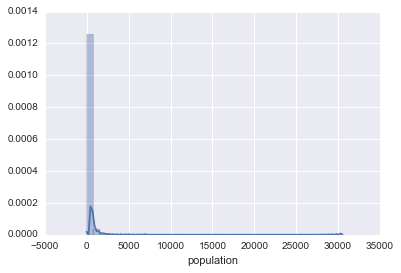

In [61]:
sns.distplot(df.population, bins = 40)
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int32
funder                   59400 non-null object
installer                59400 non-null object
basin                    59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
payment_type             59400 non-null object
water_quality            59400 non-null object
quantity                 59400 non-null object
source_type              59400 non-null object
source_class             59400 non-null object
waterpoint_type          59400 non-null object
waterpoint_type_group    59400 non-null object
status_group             59400 non-null object

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


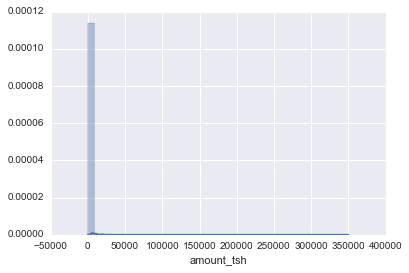

In [64]:
# Most wells have a few hundred people living around them. There are some wells
# serving huge populations. This may skew the data.
sns.distplot(df.amount_tsh, bins = 40)
plt.show()

In [65]:
# This plot measures the amount of water available at the pump. It looks a lot like the 
# population graph which makes sense. 

df.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [66]:
df.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [78]:
# There appears to be enough variation between the two to warrant keeping them in the model.
# Let's save the dataframe to a new csv file. We'll start creating models in the next notebooks.
df = df.drop('status_group_vals', 1)
df.to_csv('pump_train_for_models.csv', index=False)

In [72]:
# We'll also need to perform the same modifications to the test set.

test = pd.read_csv(r"C:\Users\me\Documents\datasets\pump_test.csv")

test = test.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management_group', 'management', 
                  'extraction_type', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'scheme_name', 'subvillage', 'quantity_group',
                 'quality_group', 'source'], axis=1)

test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)

test.permit = test.permit.fillna('Unknown')
test.public_meeting = test.public_meeting.fillna('Unknown')

test['scheme_management'] = test.apply(lambda row: scheme_wrangler(row), axis=1)
test['construction_year'] = test.apply(lambda row: construction_wrangler(row), axis=1)
test['installer'] = test.apply(lambda row: installer_wrangler(row), axis=1)
test['funder'] = test.apply(lambda row: funder_wrangler(row), axis=1)

In [79]:
df.shape

(59400, 19)

In [80]:
test.shape

(14850, 18)

In [81]:
# The train and test sets match up. We can save the test set now.

test.to_csv('pump_test_for_models.csv', index=False)